In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy.io.arff import loadarff 
from sklearn.datasets import load_iris, load_wine
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (roc_curve, auc, f1_score, accuracy_score, 
                             recall_score, precision_score, confusion_matrix, log_loss)
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Load Data

In [52]:
iris = load_iris()
iris_X, iris_y = pd.DataFrame(iris.data, columns = iris.feature_names), iris.target
iris_Xtr, iris_Xtst, iris_ytr, iris_ytst = train_test_split(iris_X, iris_y, random_state=1, stratify=iris_y, test_size=0.2)


In [53]:
glass_id = fetch_ucirepo(id=42)
glass = glass_id.data
glass_df = pd.DataFrame(glass['original'])
glass_df.drop(columns="Id_number", inplace=True)
glass_df.rename(columns= {'Type_of_glass':'Class'}, inplace = True)
glass_X, glass_y = glass_df.iloc[:, :-1], glass_df.iloc[:, -1]
glass_Xtr, glass_Xtst, glass_ytr, glass_ytst = train_test_split(glass_X, glass_y, random_state=1, stratify=glass_y, test_size=0.2)


In [54]:
wine = load_wine()
wine_X, wine_y = pd.DataFrame(wine.data, columns = wine.feature_names), wine.target
wine_Xtr, wine_Xtst, wine_ytr, wine_ytst = train_test_split(wine_X, wine_y, random_state=1, stratify=wine_y, test_size=0.2)

In [55]:
data = []

with open('data/seeds_dataset.txt', 'r') as file:
    for line in file:
        values = line.strip().split('\t')
        while '' in values:
            values.remove('')
        values = [float(value) for value in values]
        data.append(values)

seeds= pd.DataFrame(data, columns=['Area', 'Parameter', 'Compactness', 'Length', 'Width', 'Assymetry_coef', 'Groove_length', 'Class'])
seeds_X, seeds_y = seeds.iloc[:, :-1], seeds.iloc[:, -1]
seeds_Xtr, seeds_Xtst, seeds_ytr, seeds_ytst = train_test_split(seeds_X, seeds_y, random_state=1, stratify=seeds_y, test_size=0.2)

# Wstepne klasyfikatory

In [56]:
classifier_dict = {"DecisionTreeClassifier":DecisionTreeClassifier(), 'AdaBoostClassifier':AdaBoostClassifier(), "RandomForestClassifier":RandomForestClassifier(), "BaggingClassifier":BaggingClassifier()}
def first_look(X_train, X_test, y_train, y_test, classifier_dict = classifier_dict):
    for name, classifier in classifier_dict.items():
        clf = classifier
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred))

In [57]:
first_look(iris_Xtr, iris_Xtst, iris_ytr, iris_ytst)

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
          

Wszystkie top

In [58]:
first_look(glass_Xtr, glass_Xtst, glass_ytr, glass_ytst)

DecisionTreeClassifier
              precision    recall  f1-score   support

           1       0.92      0.79      0.85        14
           2       0.73      0.73      0.73        15
           3       0.33      0.67      0.44         3
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         6

    accuracy                           0.79        43
   macro avg       0.83      0.78      0.78        43
weighted avg       0.83      0.79      0.80        43

AdaBoostClassifier
              precision    recall  f1-score   support

           1       0.56      1.00      0.72        14
           2       0.50      0.47      0.48        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         2
           7       1.00      0.33      0.50         6

    accuracy                       

Adaboost top

In [59]:
first_look(wine_Xtr, wine_Xtst, wine_ytr, wine_ytst)

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.87      0.93      0.90        14
           2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
          

RFC top

In [60]:
first_look(seeds_Xtr, seeds_Xtst, seeds_ytr, seeds_ytst)

DecisionTreeClassifier
              precision    recall  f1-score   support

         1.0       0.93      0.93      0.93        14
         2.0       0.93      1.00      0.97        14
         3.0       1.00      0.93      0.96        14

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42

AdaBoostClassifier
              precision    recall  f1-score   support

         1.0       1.00      0.14      0.25        14
         2.0       1.00      1.00      1.00        14
         3.0       0.54      1.00      0.70        14

    accuracy                           0.71        42
   macro avg       0.85      0.71      0.65        42
weighted avg       0.85      0.71      0.65        42

RandomForestClassifier
              precision    recall  f1-score   support

         1.0       1.00      0.93      0.96        14
         2.0       0.93      1.00      0.97        14
         3

Bagging top

# Params

In [61]:
boosting_params = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

rfc_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5,10,15],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

bagging_params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_samples': [0.5, 0.7, 1.0, 3],
    'max_features': [0.5, 0.7, 1.0, 3],
    'bootstrap': [True, False],
}

# Boosting

In [62]:
all_iris = (iris_Xtr, iris_Xtst, iris_ytr, iris_ytst)
all_wine = (glass_Xtr, glass_Xtst, glass_ytr, glass_ytst)
all_glass = (wine_Xtr, wine_Xtst, wine_ytr, wine_ytst)
all_seeds = (seeds_Xtr, seeds_Xtst, seeds_ytr, seeds_ytst)

In [ ]:
def evaluate_model(classifier, param_grid, X_train, X_test, y_train, y_test):
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
    
    grid_search.fit(X_train, y_train)
    
    results = grid_search.cv_results_
    
    data = []
    
    for i in range(len(results['params'])):
        params = results['params'][i]
        
        model = grid_search.estimator.set_params(**params)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        
        result = params.copy()
        result.update({
            'f1_score': f1,
            'accuracy': accuracy,
            'recall': recall,
            'precision': precision
        })
        data.append(result)
    
    df = pd.DataFrame(data).sort_values(by=['f1_score', 'accuracy', 'recall','precision'], ascending=False)
    
    return df

In [ ]:
evaluate_model(AdaBoostClassifier(), boosting_params, *all_wine)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,algorithm,learning_rate,n_estimators,f1_score,accuracy,recall,precision
10,SAMME,0.100,200,0.631994,0.674419,0.674419,0.595930
21,SAMME.R,0.010,100,0.630233,0.697674,0.697674,0.579319
11,SAMME,0.100,500,0.610418,0.651163,0.651163,0.575923
8,SAMME,0.100,50,0.571650,0.627907,0.627907,0.551974
9,SAMME,0.100,100,0.571650,0.627907,0.627907,0.551974
15,SAMME,1.000,500,0.571247,0.604651,0.604651,0.591860
14,SAMME,1.000,200,0.555811,0.581395,0.581395,0.543092
26,SAMME.R,0.100,200,0.548817,0.604651,0.604651,0.541344
17,SAMME.R,0.001,100,0.546426,0.604651,0.604651,0.503283
18,SAMME.R,0.001,200,0.546426,0.604651,0.604651,0.503283


In [ ]:
evaluate_model(AdaBoostClassifier(), boosting_params, *all_glass)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,algorithm,learning_rate,n_estimators,f1_score,accuracy,recall,precision
13,SAMME,1.000,100,1.000000,1.000000,1.000000,1.000000
14,SAMME,1.000,200,1.000000,1.000000,1.000000,1.000000
6,SAMME,0.010,200,0.972263,0.972222,0.972222,0.974359
7,SAMME,0.010,500,0.972263,0.972222,0.972222,0.974359
8,SAMME,0.100,50,0.972263,0.972222,0.972222,0.974359
12,SAMME,1.000,50,0.972263,0.972222,0.972222,0.974359
3,SAMME,0.001,500,0.972097,0.972222,0.972222,0.974074
4,SAMME,0.010,50,0.972097,0.972222,0.972222,0.974074
5,SAMME,0.010,100,0.972097,0.972222,0.972222,0.974074
15,SAMME,1.000,500,0.972097,0.972222,0.972222,0.974074


In [ ]:
evaluate_model(AdaBoostClassifier(), boosting_params, *all_seeds)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,algorithm,learning_rate,n_estimators,f1_score,accuracy,recall,precision
5,SAMME,0.010,100,0.976160,0.976190,0.976190,0.977778
6,SAMME,0.010,200,0.976160,0.976190,0.976190,0.977778
7,SAMME,0.010,500,0.976160,0.976190,0.976190,0.977778
8,SAMME,0.100,50,0.976160,0.976190,0.976190,0.977778
16,SAMME.R,0.001,50,0.976160,0.976190,0.976190,0.977778
17,SAMME.R,0.001,100,0.976160,0.976190,0.976190,0.977778
18,SAMME.R,0.001,200,0.976160,0.976190,0.976190,0.977778
19,SAMME.R,0.001,500,0.976160,0.976190,0.976190,0.977778
20,SAMME.R,0.010,50,0.976160,0.976190,0.976190,0.977778
21,SAMME.R,0.010,100,0.976160,0.976190,0.976190,0.977778


# Random Forest

In [ ]:
evaluate_model(RandomForestClassifier(), rfc_params, *all_wine)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,criterion,max_depth,min_samples_leaf,n_estimators,f1_score,accuracy,recall,precision
0,gini,NaN,1,100,0.808970,0.813953,0.813953,0.837806
39,entropy,NaN,2,100,0.808970,0.813953,0.813953,0.837806
54,entropy,10.0,1,100,0.808970,0.813953,0.813953,0.837806
55,entropy,10.0,1,200,0.808970,0.813953,0.813953,0.837806
56,entropy,10.0,1,500,0.808970,0.813953,0.813953,0.837806
...,...,...,...,...,...,...,...,...
15,gini,5.0,5,100,0.673865,0.697674,0.697674,0.683363
12,gini,5.0,2,100,0.653547,0.674419,0.674419,0.659136
17,gini,5.0,5,500,0.653547,0.674419,0.674419,0.659136
16,gini,5.0,5,200,0.651680,0.674419,0.674419,0.658915


In [ ]:
evaluate_model(RandomForestClassifier(), rfc_params, *all_glass)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,criterion,max_depth,min_samples_leaf,n_estimators,f1_score,accuracy,recall,precision
0,gini,NaN,1,100,1.000000,1.000000,1.000000,1.000000
1,gini,NaN,1,200,1.000000,1.000000,1.000000,1.000000
2,gini,NaN,1,500,1.000000,1.000000,1.000000,1.000000
3,gini,NaN,2,100,1.000000,1.000000,1.000000,1.000000
4,gini,NaN,2,200,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
60,entropy,10.0,5,100,0.972263,0.972222,0.972222,0.974359
62,entropy,10.0,5,500,0.972263,0.972222,0.972222,0.974359
70,entropy,15.0,5,200,0.972263,0.972222,0.972222,0.974359
71,entropy,15.0,5,500,0.972263,0.972222,0.972222,0.974359


In [ ]:
evaluate_model(RandomForestClassifier(), rfc_params, *all_seeds)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,criterion,max_depth,min_samples_leaf,n_estimators,f1_score,accuracy,recall,precision
40,entropy,NaN,2,200,1.000000,1.000000,1.000000,1.000000
57,entropy,10.0,2,100,1.000000,1.000000,1.000000,1.000000
0,gini,NaN,1,100,0.976160,0.976190,0.976190,0.977778
1,gini,NaN,1,200,0.976160,0.976190,0.976190,0.977778
2,gini,NaN,1,500,0.976160,0.976190,0.976190,0.977778
...,...,...,...,...,...,...,...,...
15,gini,5.0,5,100,0.928395,0.928571,0.928571,0.932692
17,gini,5.0,5,500,0.928395,0.928571,0.928571,0.932692
26,gini,10.0,5,500,0.928395,0.928571,0.928571,0.932692
34,gini,15.0,5,200,0.928395,0.928571,0.928571,0.932692


# Bagging

In [ ]:
evaluate_model(BaggingClassifier(), bagging_params, *all_wine)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


,bootstrap,max_features,max_samples,n_estimators,f1_score,accuracy,recall,precision
91,False,0.5,1.0,50,0.835446,0.837209,0.837209,0.845004
92,False,0.5,1.0,100,0.835047,0.837209,0.837209,0.852804
111,False,0.7,1.0,50,0.832494,0.837209,0.837209,0.845607
130,False,1.0,1.0,10,0.816745,0.813953,0.813953,0.840276
51,True,1.0,1.0,50,0.812822,0.813953,0.813953,0.829490
...,...,...,...,...,...,...,...,...
119,False,0.7,3.0,500,0.261628,0.325581,0.325581,0.220155
97,False,0.5,3.0,100,0.251163,0.348837,0.348837,0.213241
15,True,0.5,3.0,10,0.215116,0.348837,0.348837,0.281906
117,False,0.7,3.0,100,0.212701,0.302326,0.302326,0.212235


In [ ]:
evaluate_model(BaggingClassifier(), bagging_params, *all_glass)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


,bootstrap,max_features,max_samples,n_estimators,f1_score,accuracy,recall,precision
0,True,0.5,0.5,10,1.000000,1.000000,1.000000,1.000000
2,True,0.5,0.5,100,1.000000,1.000000,1.000000,1.000000
3,True,0.5,0.5,200,1.000000,1.000000,1.000000,1.000000
4,True,0.5,0.5,500,1.000000,1.000000,1.000000,1.000000
6,True,0.5,0.7,50,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
55,True,1.0,3.0,10,0.618174,0.638889,0.638889,0.716049
75,True,3.0,3.0,10,0.575279,0.583333,0.583333,0.586988
136,False,1.0,3.0,50,0.575253,0.666667,0.666667,0.542735
95,False,0.5,3.0,10,0.544949,0.638889,0.638889,0.509402


In [ ]:
evaluate_model(BaggingClassifier(), bagging_params, *all_seeds)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


,bootstrap,max_features,max_samples,n_estimators,f1_score,accuracy,recall,precision
40,True,1.0,0.5,10,1.000000,1.000000,1.000000,1.000000
45,True,1.0,0.7,10,1.000000,1.000000,1.000000,1.000000
47,True,1.0,0.7,100,1.000000,1.000000,1.000000,1.000000
70,True,3.0,1.0,10,1.000000,1.000000,1.000000,1.000000
101,False,0.7,0.5,50,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
136,False,1.0,3.0,50,0.702105,0.714286,0.714286,0.846154
115,False,0.7,3.0,10,0.632353,0.714286,0.714286,0.800000
75,True,3.0,3.0,10,0.585621,0.690476,0.690476,0.788889
155,False,3.0,3.0,10,0.549481,0.666667,0.666667,0.483951


# Best Classifiers and params

In [64]:
def visualize_model_performance(init_model, param_grid, X_train, X_test, y_train, y_test, model_name = "AdaBoostClassifier"):
    grid_search = GridSearchCV(estimator=init_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    params = grid_search.best_params_
    model = grid_search.estimator.set_params(**params)
    def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()

    plot_learning_curve(model, f"Learning Curve ({model_name})", X_train, y_train, cv=5, n_jobs=-1)
    
    # ROC Curve and AUC
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    if hasattr(model, "predict_proba"):
        classifier = OneVsRestClassifier(model)
        y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure()
        colors = ['aqua', 'darkorange', 'cornflowerblue'] if n_classes==3 else ['aqua', 'darkorange', 'cornflowerblue', 'forestgreen', 'crimson', 'gold']
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic ({model_name})')
        plt.legend(loc="lower right")
        plt.show()
    
    # Confusion Matrix
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(params)

# AdaBoost

Fitting 5 folds for each of 32 candidates, totalling 160 fits


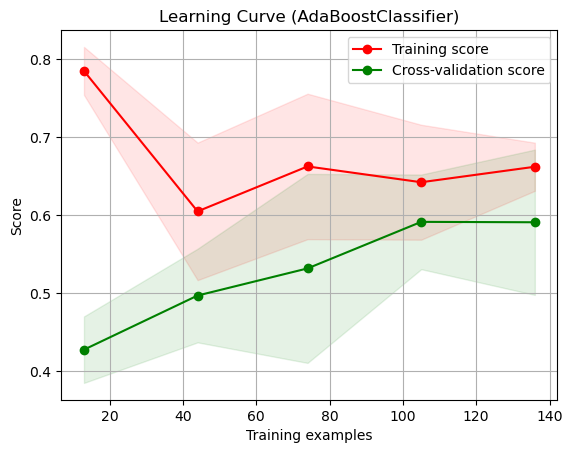

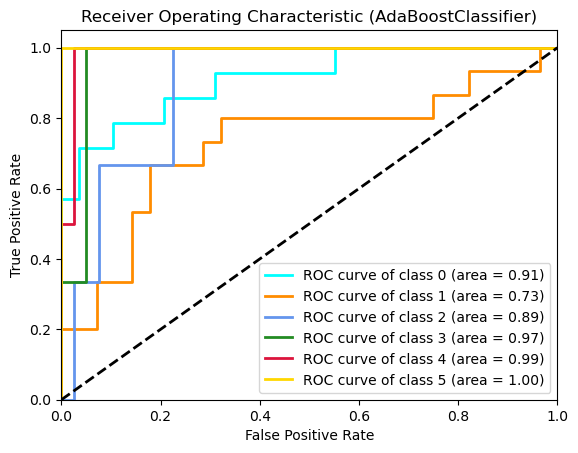

              precision    recall  f1-score   support

           1       0.62      0.36      0.45        14
           2       0.48      0.80      0.60        15
           3       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.60        43
   macro avg       0.60      0.58      0.58        43
weighted avg       0.59      0.60      0.57        43

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 500}


In [65]:
visualize_model_performance(AdaBoostClassifier(),boosting_params ,*all_wine)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


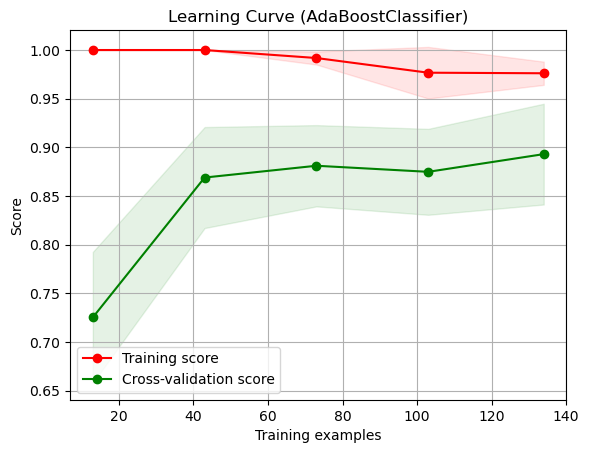

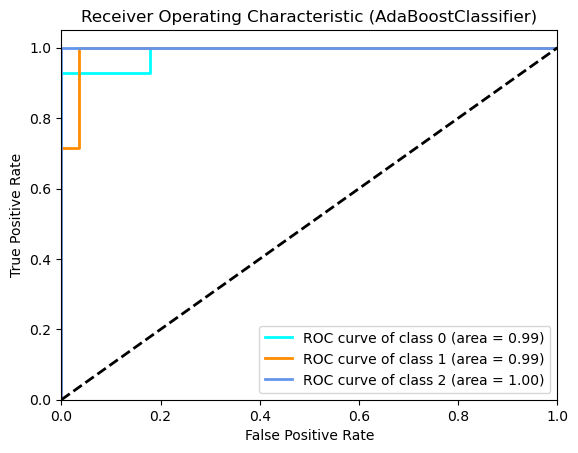

              precision    recall  f1-score   support

         1.0       0.93      0.93      0.93        14
         2.0       0.93      1.00      0.97        14
         3.0       1.00      0.93      0.96        14

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}


In [66]:
visualize_model_performance(AdaBoostClassifier(),boosting_params ,*all_seeds)

# RandomForest

Fitting 5 folds for each of 72 candidates, totalling 360 fits


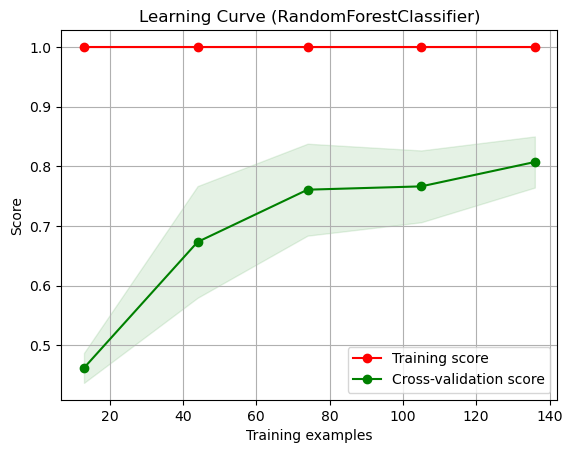

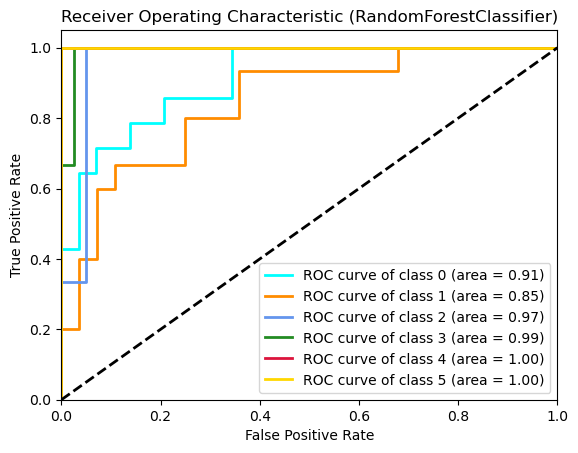

              precision    recall  f1-score   support

           1       0.63      0.86      0.73        14
           2       0.77      0.67      0.71        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         6

    accuracy                           0.77        43
   macro avg       0.90      0.73      0.77        43
weighted avg       0.80      0.77      0.76        43

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 500}


In [67]:
visualize_model_performance(RandomForestClassifier(),rfc_params,*all_wine, model_name="RandomForestClassifier")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


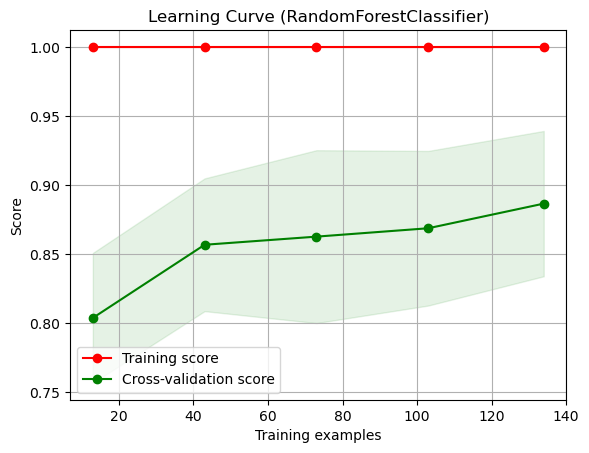

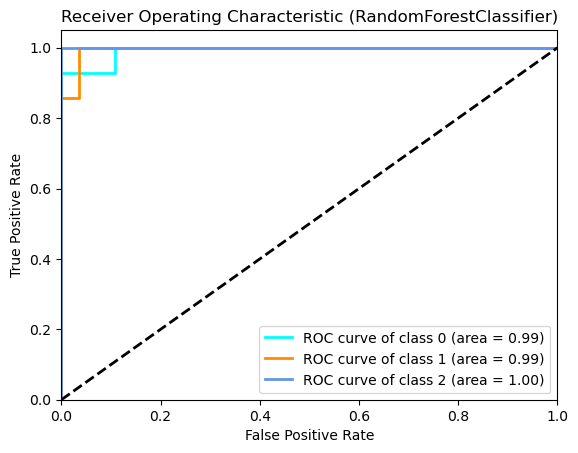

              precision    recall  f1-score   support

         1.0       1.00      0.93      0.96        14
         2.0       0.93      1.00      0.97        14
         3.0       1.00      1.00      1.00        14

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}


In [68]:
visualize_model_performance(RandomForestClassifier(),rfc_params,*all_seeds, model_name="RandomForestClassifier")

# Bagging

Fitting 5 folds for each of 160 candidates, totalling 800 fits


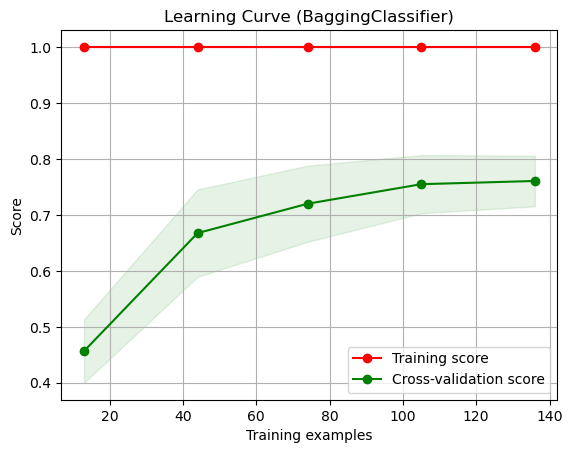

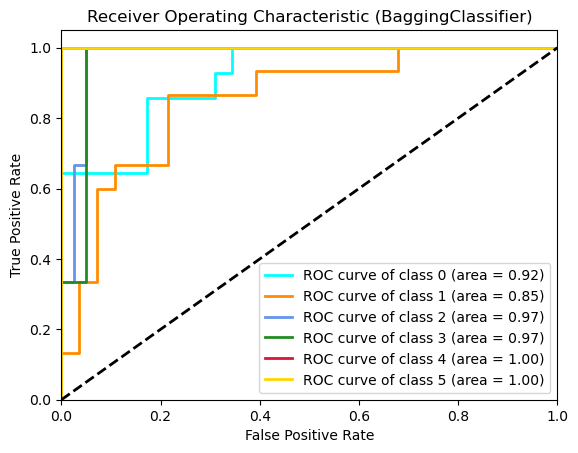

              precision    recall  f1-score   support

           1       0.67      0.86      0.75        14
           2       0.79      0.73      0.76        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         6

    accuracy                           0.79        43
   macro avg       0.91      0.74      0.78        43
weighted avg       0.82      0.79      0.78        43

{'bootstrap': True, 'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 200}


In [69]:
visualize_model_performance(BaggingClassifier(), bagging_params,*all_wine, model_name="BaggingClassifier")

Fitting 5 folds for each of 160 candidates, totalling 800 fits


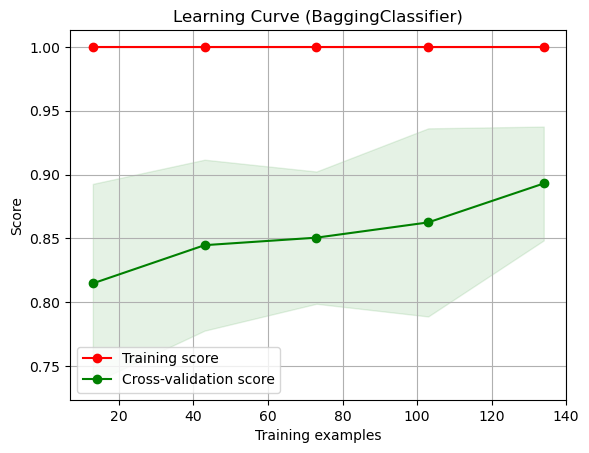

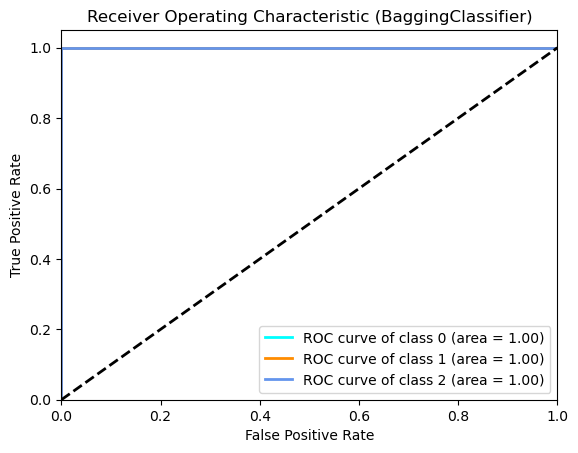

              precision    recall  f1-score   support

         1.0       0.88      1.00      0.93        14
         2.0       1.00      0.93      0.96        14
         3.0       1.00      0.93      0.96        14

    accuracy                           0.95        42
   macro avg       0.96      0.95      0.95        42
weighted avg       0.96      0.95      0.95        42

{'bootstrap': False, 'max_features': 3, 'max_samples': 1.0, 'n_estimators': 10}


In [70]:
visualize_model_performance(BaggingClassifier(), bagging_params,*all_seeds, model_name="BaggingClassifier")